In [ ]:
!pip uninstall -y transformers
!pip install transformers
!pip install accelerate -U
!pip install transformers datasets

Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Read the dataset by mounting drive and settimg the *path*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CourseMaterial

/content/drive/MyDrive/CourseMaterial


In [ ]:
df = pd.read_csv('Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Extract the relevant columns

In [ ]:
df = df[['airline_sentiment', 'text']].copy()

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Check if the data is balanced

<Axes: >

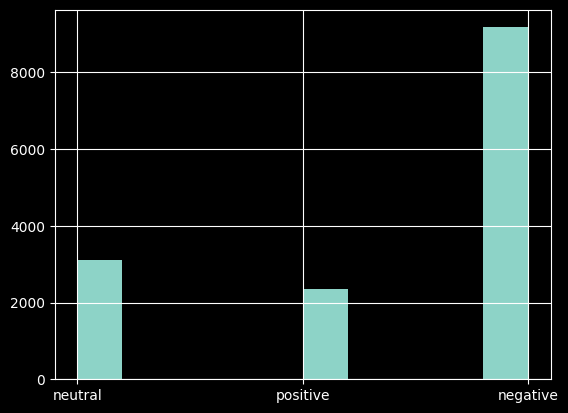

In [ ]:
df['airline_sentiment'].hist()

# Map the labels to integers

In [ ]:
label_map = {'positive' : 1, 'negative' : 0, 'neutral' : 2}  # map the labels to integers which is required for neural networks.
df['labels'] = df['airline_sentiment'].map(label_map)

In [ ]:
df2 = df[['text','labels']]

In [ ]:
df2.head()

,text,labels
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


# Fullfilling the requirements of Hugging face dataset

In [ ]:
df2.columns =['sentence', 'label'] # saving new csv file with new column names specially important is to change target as label
df2.to_csv('data.csv', index = None) # Converting to csv is important for using hugging face dataset

In [ ]:
!head data.csv # two columns in new csv with head in the first column and label in the second column

sentence,label
@VirginAmerica What @dhepburn said.,2
@VirginAmerica plus you've added commercials to the experience... tacky.,1
@VirginAmerica I didn't today... Must mean I need to take another trip!,2
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
@VirginAmerica and it's a really big bad thing about it,0
"@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA",0
"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1
"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",2


# Transforming our dataset to hugging face dataset

In [ ]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files = 'data.csv') # import data to our hugging face datasets. First argument is csv and second argument is path to csv data.

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

# Split the data into training and testing

In [ ]:
data = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

# Import Tokenizer

In [ ]:
from transformers import AutoTokenizer

In [ ]:
checkpoint ="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# Write function to pass an argument that truncation = True

In [ ]:
def tokenize_func(batch):
  return tokenizer(batch['sentence'], truncation = True) # Trainer will handle the padding

In [ ]:
tokenized_datasets = data.map(tokenize_func, batched = True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

# Import Training Argumets, trainer and Model

In [ ]:
from transformers import TrainingArguments, AutoModelForSequenceClassification, Trainer

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels =3
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Set the training Arguments

In [ ]:
training_args = TrainingArguments(
    output_dir= 'training_dir',
    evaluation_strategy='epoch',  # means if we want to evaluate model on validation set
    save_strategy='epoch',        # means save model after every epoch which is not a good idea because you will runout of colab space
    num_train_epochs= 3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size= 64
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['test'],
    tokenizer = tokenizer,
)

# Train the model

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.524300,0.447603
2,0.335400,0.451872
3,0.239100,0.571336


TrainOutput(global_step=1923, training_loss=0.3199950489474657, metrics={'train_runtime': 434.4757, 'train_samples_per_second': 70.761, 'train_steps_per_second': 4.426, 'total_flos': 358192024288848.0, 'train_loss': 0.3199950489474657, 'epoch': 3.0})

In [ ]:
!ls training_dir # we can see the three checkpoints because model is trained on three epochs

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


# load the Save model

In [ ]:
from transformers import pipeline

In [ ]:
savemodel = pipeline('text-classification', model = 'training_dir/checkpoint-1282', device = 0)

# Get the test data and test the model

In [ ]:
data['test'] # access the test set

Dataset({
    features: ['sentence', 'label'],
    num_rows: 4392
})

In [ ]:
y_pred = savemodel(data['test']['sentence']) # run the test set on our saved model to get the test predictions

In [ ]:
y_pred

[{'label': 'LABEL_1', 'score': 0.919318675994873},
 {'label': 'LABEL_1', 'score': 0.8695944547653198},
 {'label': 'LABEL_1', 'score': 0.7305334806442261},
 {'label': 'LABEL_1', 'score': 0.48865410685539246},
 {'label': 'LABEL_1', 'score': 0.42011791467666626},
 {'label': 'LABEL_0', 'score': 0.9958974123001099},
 {'label': 'LABEL_2', 'score': 0.8072807788848877},
 {'label': 'LABEL_2', 'score': 0.8709767460823059},
 {'label': 'LABEL_2', 'score': 0.6388912796974182},
 {'label': 'LABEL_0', 'score': 0.9971349239349365},
 {'label': 'LABEL_0', 'score': 0.979393482208252},
 {'label': 'LABEL_0', 'score': 0.9940155744552612},
 {'label': 'LABEL_1', 'score': 0.9575759172439575},
 {'label': 'LABEL_0', 'score': 0.9948832988739014},
 {'label': 'LABEL_2', 'score': 0.9823013544082642},
 {'label': 'LABEL_1', 'score': 0.5455375909805298},
 {'label': 'LABEL_0', 'score': 0.6858651041984558},
 {'label': 'LABEL_0', 'score': 0.9968744516372681},
 {'label': 'LABEL_0', 'score': 0.9750030040740967},
 {'label': '

# Transforming Generic Labels to integers

In [ ]:
ypred = []
for i in y_pred:
  if i['label'] == 'LABEL_1':
    ypred.append(1)
  elif i['label'] == 'LABEL_2':
    ypred.append(2)
  else:
    ypred.append(0)

In [ ]:
ypred

[1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,


# Print Confusion Matrix and calculate accuracy, precision and recall

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

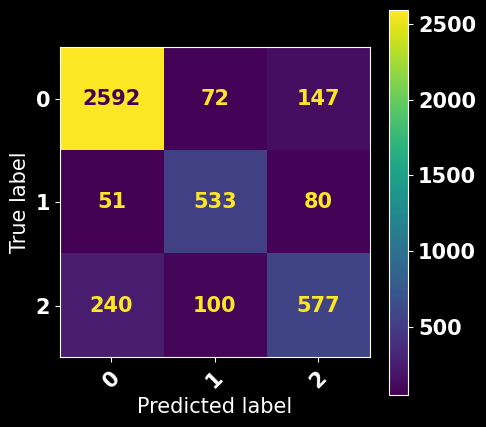

In [ ]:
cm = confusion_matrix(data['test']['label'], ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1, 2])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

In [ ]:
Accuracy = accuracy_score(data['test']['label'], ypred, normalize=True).round(3)
Precision = precision_score(data['test']['label'], ypred, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(data['test']['label'], ypred, average = 'macro').round(3)
F1_Score = f1_score(data['test']['label'], ypred, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")

Accuracy :  0.843
 
Precision :  0.791
 
Recall :  0.785
 
F1_Score :  0.787
 
